In [1]:
import cv2
import mediapipe as mp
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import time
from moviepy import*
from moviepy.editor import*
%matplotlib notebook

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [2]:
def draw(image):

    BG_COLOR = (192, 192, 192) # gray
    
    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True,min_detection_confidence=0.5) as pose:
        
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        if not results.pose_world_landmarks:
            print('No data to return')
            return
        
    x1,y1,z1 = (results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x,
                results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y,
                results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].z)
    x2,y2,z2 = (results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x,
                results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y,
                results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].z)

    
    coord1 = np.array([x1,y1,z1])
    coord2 = np.array([x2,y2,z2]) 
    
    return coord1, coord2

In [3]:
def extract_points_from_video(videofile):
    
    start = time.time()
    # Reading video
    video = VideoFileClip(videofile)

    # Stats
    duration = video.duration
    fps = round(video.fps)
    nbframes = round(duration * fps)
    
    # Capture the results frames into a video
    capture = cv2.VideoCapture(videofile)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    
    wrist_coord = []
    elbow_coord = []
    
    while capture.isOpened():
        (ret, frame) = capture.read()
        
        if ret == True:
            wrist, elb = draw(frame)
            wrist_coord.append(wrist)
            elbow_coord.append(elb)
        else:
            break
    #print(wrist_coord)
    #print("----------------------------------------------")
    #print(elbow_coord)
     
    return wrist_coord, elbow_coord

In [4]:
def draw_3D_Matplot(array1,array2):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')
    ax.set_zlabel('$z$')
    
    x_s = []
    y_s = []
    z_s = []
    
    for i in array1:
        x_s.append(i[0])
        y_s.append(i[1])
        z_s.append(i[2])

    
    ax.plot3D(x_s,y_s,z_s, color = 'blue')
    ax.scatter3D(array1[0][0],array1[0][1],array1[0][2], color = 'blue', marker = 'o',s = 100)
    ax.scatter3D(array1[-1][0],array1[-1][1],array1[-1][2], color = 'blue', marker = '^', s = 100)
    
    x_s = []
    y_s = []
    z_s = []
    
    
    for i in array2:
        x_s.append(i[0])
        y_s.append(i[1])
        z_s.append(i[2])

    ax.plot3D(x_s,y_s,z_s, color = 'red')
    ax.scatter3D(array2[0][0],array2[0][1],array2[0][2], color = 'red', marker = 'o',s = 100)
    ax.scatter3D(array2[-1][0],array2[-1][1],array2[-1][2], color = 'red', marker = '^', s = 100)


    #for i in array2:
    #    ax.scatter3D(i[0],i[1],i[2], color = 'red')

    #ax.scatter3D(array1[0, :], label = "wrist movement")
    #ax.plot(array2, label = "elbow movement") 
    
    #ax.scatter([array1[0][0],array1[0][1],array1[0][2]],[array2[0][0],array2[0][1],array2[0][2]])
    
    #ax.legend()
    
    plt.show()

In [10]:
def draw_2D_Matplot(array1,array2):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('$Y$')
    ax.set_ylabel('$Z$')
    
    x_s = []
    y_s = []
    
    for i in array1:
        x_s.append(i[1])
        y_s.append(i[2])
    
    
    ax.plot(x_s,y_s, color = 'blue')
    ax.scatter(array1[0][1],array1[0][2], color = 'blue', marker = 'o',s = 100)
    ax.scatter(array1[-1][1],array1[-1][2], color = 'blue', marker = '^', s = 100)
    
    x_s = []
    y_s = []
    
    
    for i in array2:
        x_s.append(i[1])
        y_s.append(i[2])
        
    ax.plot(x_s,y_s, color = 'red')
    ax.scatter(array2[0][1],array2[0][2], color = 'red', marker = 'o',s = 100)
    ax.scatter(array2[-1][1],array2[-1][2], color = 'red', marker = '^', s = 100)
    
    plt.show()

# Side View: Straight Foward

<IPython.core.display.Javascript object>


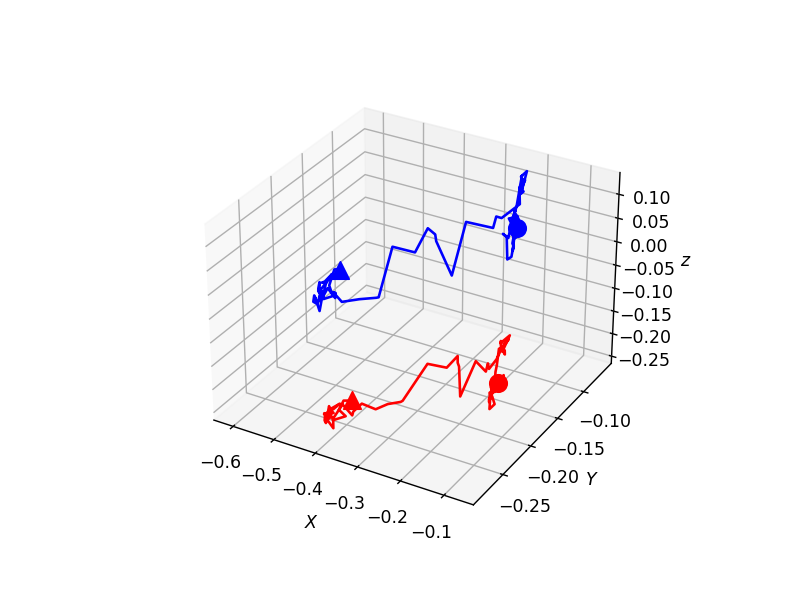

<IPython.core.display.Javascript object>


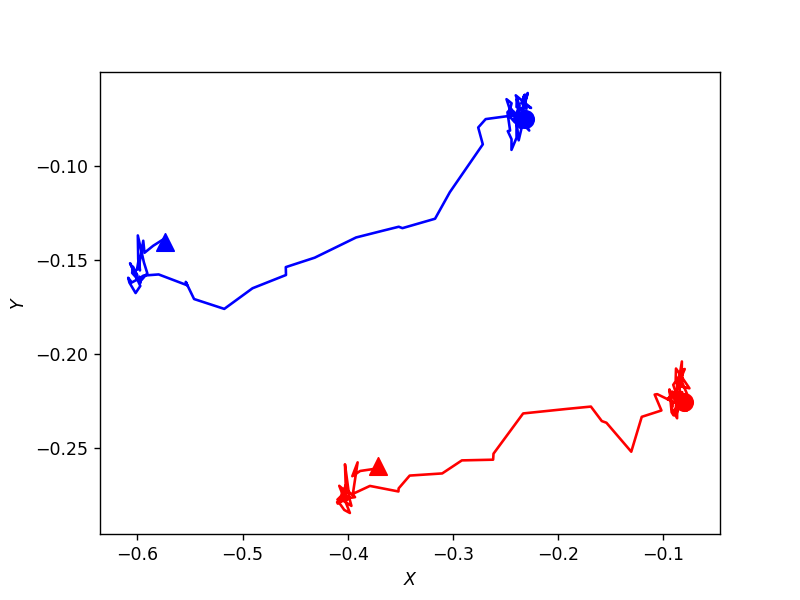

In [10]:
a, b  = extract_points_from_video("pose1.mp4")
draw_3D_Matplot(a,b)
draw_2D_Matplot(a,b)

# Side View: Angled

<IPython.core.display.Javascript object>


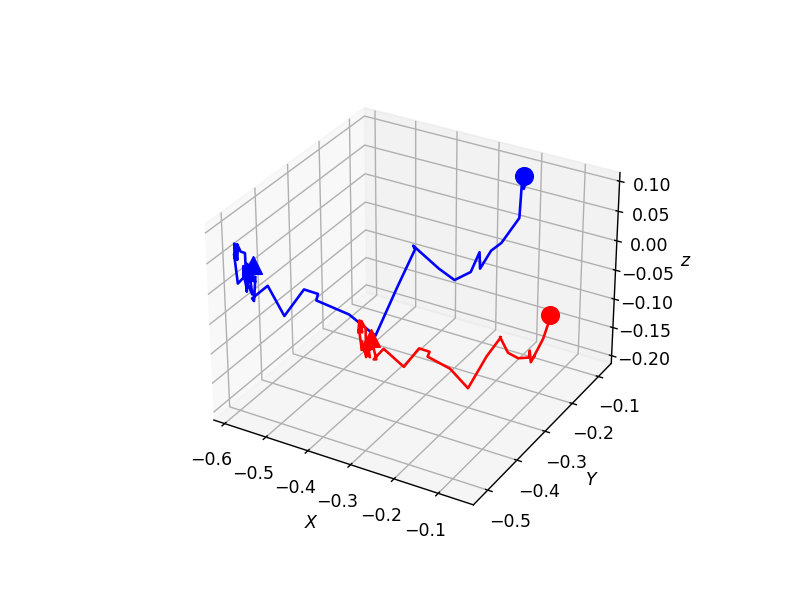

<IPython.core.display.Javascript object>


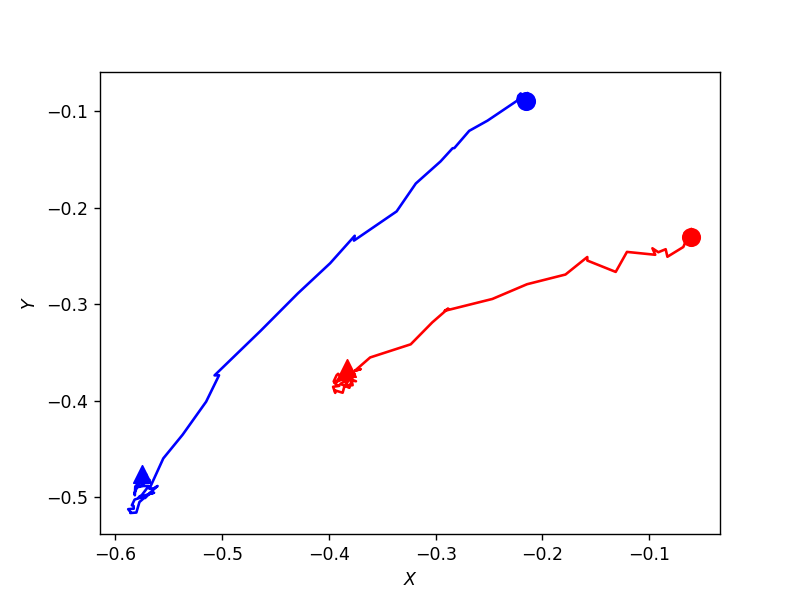

In [12]:
a, b  = extract_points_from_video("pose2.mp4")
draw_3D_Matplot(a,b)
draw_2D_Matplot(a,b)

# Side View: Straight Up

<IPython.core.display.Javascript object>


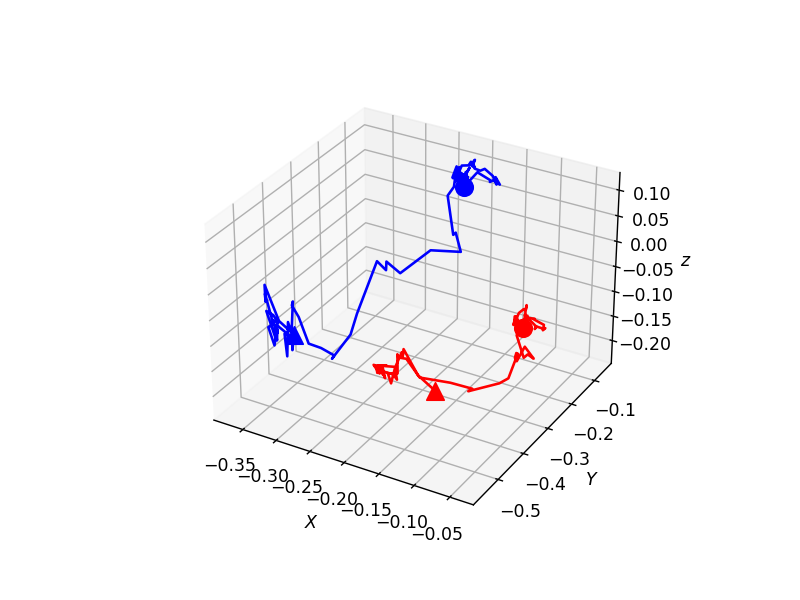

<IPython.core.display.Javascript object>


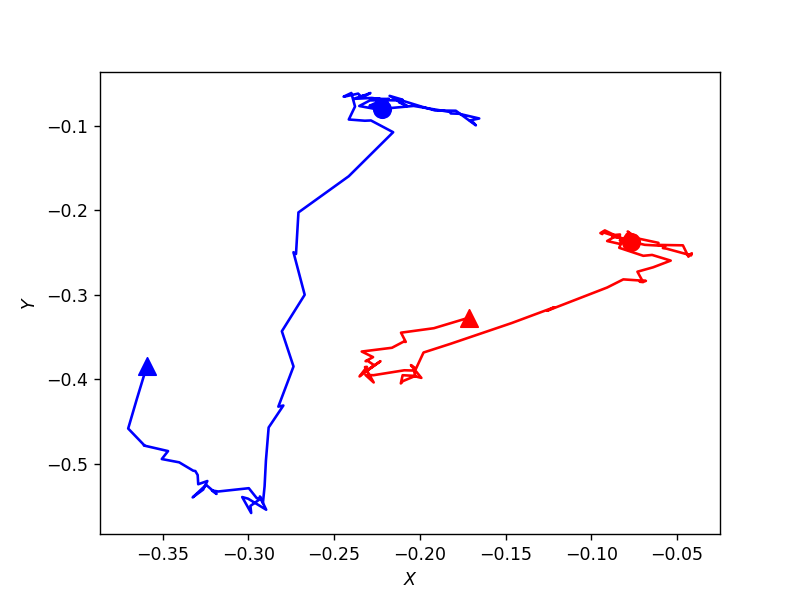

In [13]:
a, b  = extract_points_from_video("pose3.mp4")
draw_3D_Matplot(a,b)
draw_2D_Matplot(a,b)

# Front View: Straight Foward

<IPython.core.display.Javascript object>


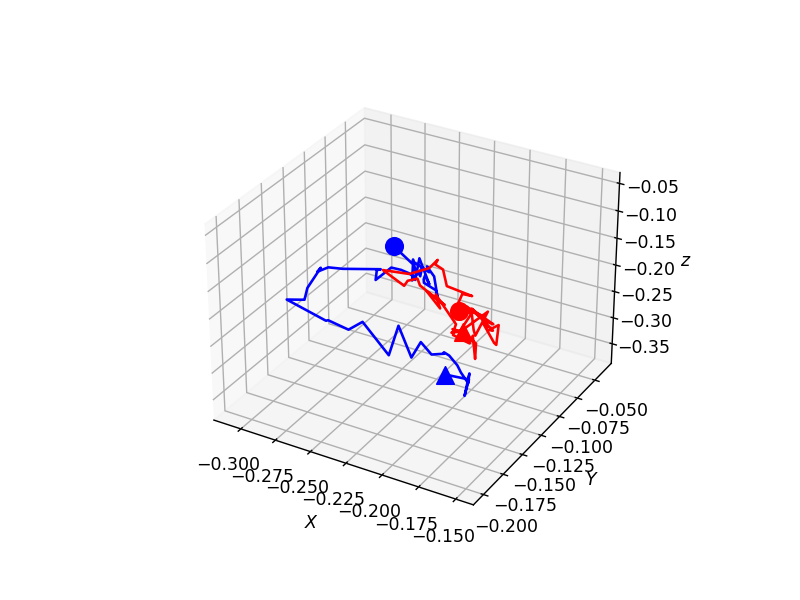

<IPython.core.display.Javascript object>


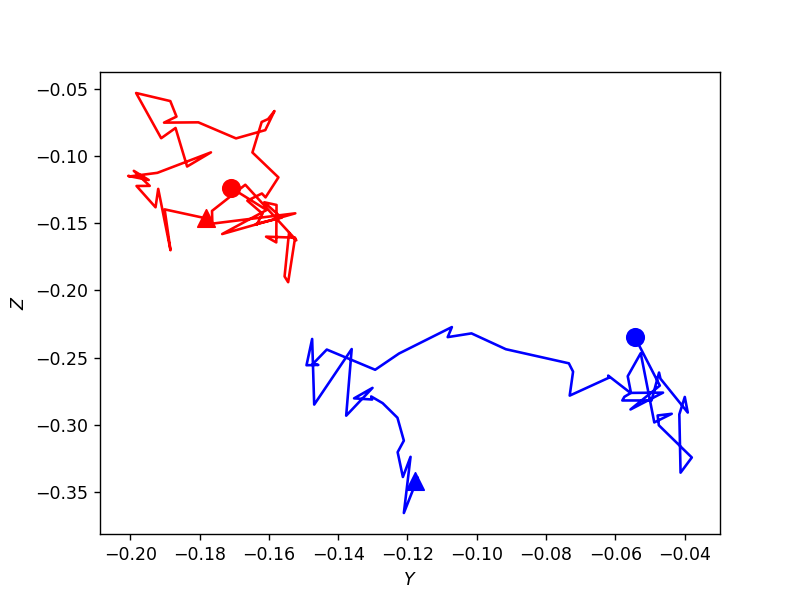

In [11]:
a, b  = extract_points_from_video("pose4.mp4")
draw_3D_Matplot(a,b)
draw_2D_Matplot(a,b)

# Front View: Angled

<IPython.core.display.Javascript object>


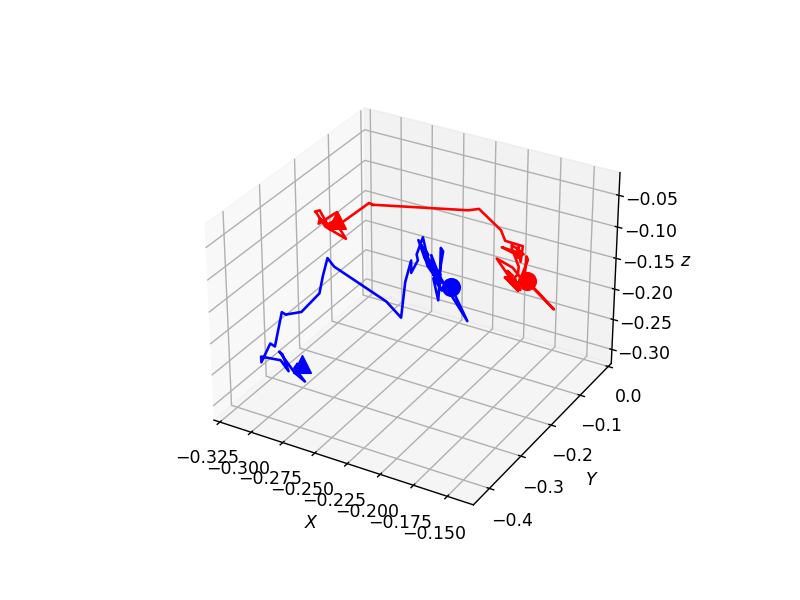

<IPython.core.display.Javascript object>


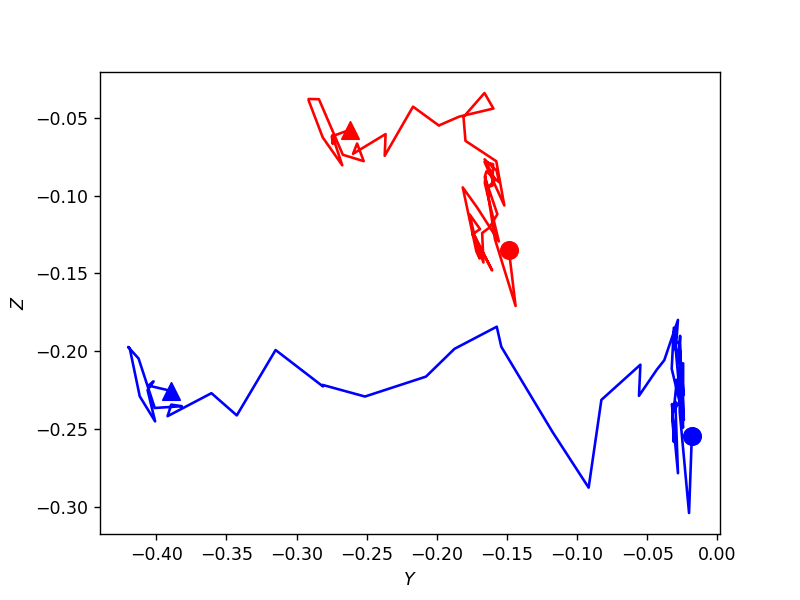

In [13]:
a, b  = extract_points_from_video("pose5.mp4")
draw_3D_Matplot(a,b)
draw_2D_Matplot(a,b)

# Front View: Straight Up

<IPython.core.display.Javascript object>


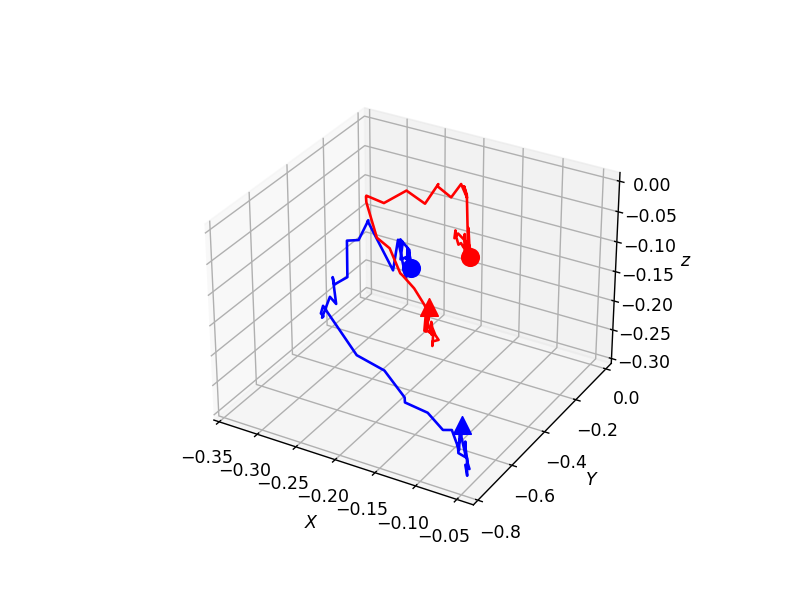

<IPython.core.display.Javascript object>


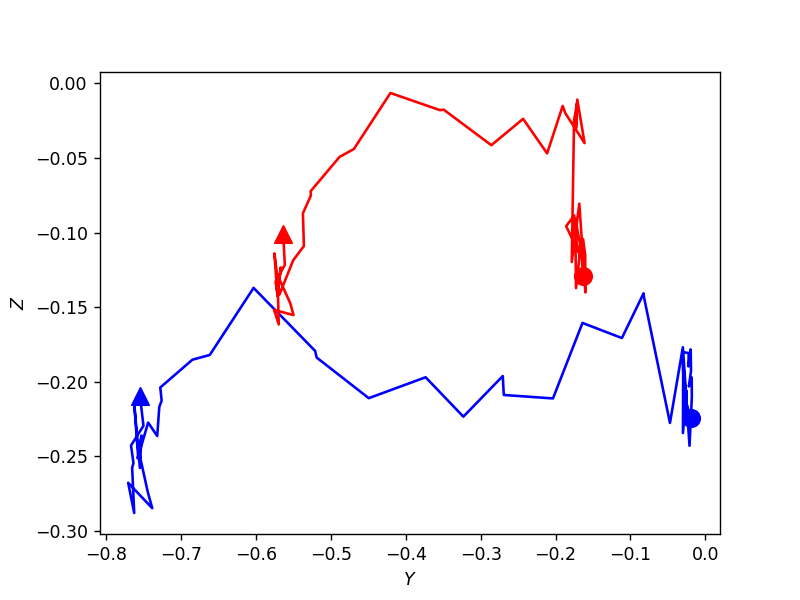

In [14]:
a, b  = extract_points_from_video("pose6.mp4")
draw_3D_Matplot(a,b)
draw_2D_Matplot(a,b)

<IPython.core.display.Javascript object>


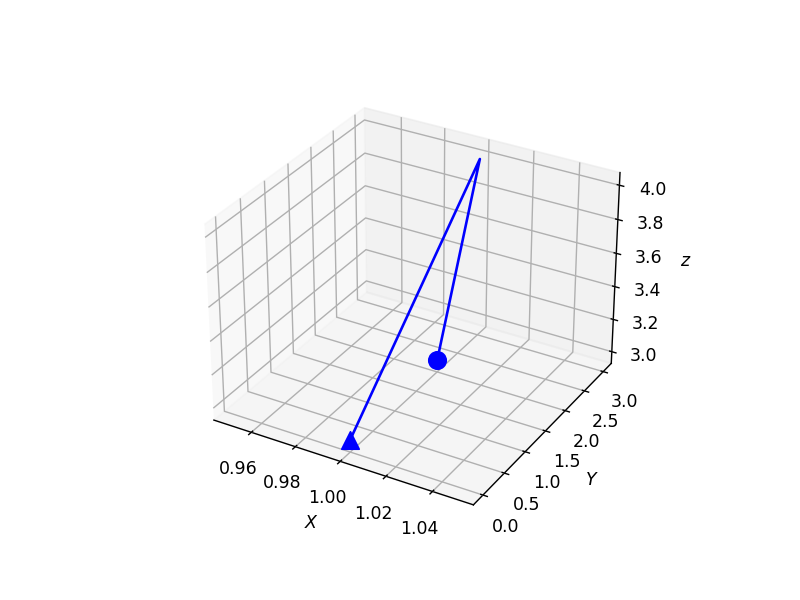

In [25]:
#add axis labes, start point and end point

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(1,2,2)
ax.set_xlabel('$X$')# fontsize=20, rotation=150)
ax.set_ylabel('$Y$')
ax.set_zlabel('$z$')#, fontsize=30, rotation=60)

lst = [[1,2,3],[1,3,4],[1,0,3]]
x_s = []
y_s = []
z_s = []

for i in lst:
    x_s.append(i[0])
    y_s.append(i[1])
    z_s.append(i[2])

ax.plot3D(x_s,y_s,z_s, color = 'blue')
ax.scatter3D(lst[0][0],lst[0][1],lst[0][2], color = 'blue', marker = 'o',s = 100)
ax.scatter3D(lst[-1][0],lst[-1][1],lst[-1][2], color = 'blue', marker = '^', s = 100)
